In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True, threshold=20)
%matplotlib inline

[sklearn 官方文档](https://github.com/apachecn/sklearn-doc-zh/blob/master/docs/0.21.3/5.md)

支持向量机 (SVMs) 可用于以下监督学习算法: 分类, 回归 和 异常检测.

支持向量机的优势在于:

- 在高维空间中非常高效.
- 即使在数据维度比样本数量大的情况下仍然有效.
- 在决策函数（称为支持向量）中使用训练集的子集,因此它也是高效利用内存的.
- 通用性: 不同的 核函数 与特定的决策函数一一对应.常见的 kernel 已经提供,也可以指定定制的内核.

支持向量机的缺点包括:

- 如果特征数量比样本数量大得多,在选择 核函数 时要避免过拟合, 而且正则化项是非常重要的.
- 支持向量机不直接提供概率估计,这些都是使用昂贵的五次交叉验算计算的. (详情见 得分和概率).

在 scikit-learn 中,支持向量机提供 dense(numpy.ndarray ,可以通过 numpy.asarray 进行转换) 和 sparse (任何 scipy.sparse) 样例向量作为输出.然而,要使用支持向量机来对 sparse 数据作预测,它必须已经拟合这样的数据.使用行优先存储（C-order）的 numpy.ndarray (dense) 或者带有 dtype=float64 的 scipy.sparse.csr_matrix (sparse) 来优化性能.

`SVC`, `NuSVC` 和` LinearSVC` 能在数据集中实现多元分类.

`SVC `和 `NuSVC` 是相似的方法, 但是接受稍许不同的参数设置并且有不同的数学方程.`LinearSVC`是另一个实现线性核函数的支持向量分类(相当于SVC(kernel='linear))

### sklearn.svm.SVC

*(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None,random_state=None)*

参数：

- C：C-SVC的惩罚参数C默认值是1.0

C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。

- kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
    
    – 线性：u'v
    
    – 多项式：(gamma*u'*v + coef0)^degree

    – RBF (Radial Basis Function, 径向基函数)函数：exp(-gamma|u-v|^2)
    > 所谓径向基函数 (Radial Basis Function 简称 RBF), 就是某种沿径向对称的标量函数。 通常定义为空间中任一点$x$到某一中心$x_c$之间欧氏距离的单调函数 ,可记作 $K(||x-x_c||)$, 其作用往往是局部的 , 即当x远离xc时函数取值很小。最常用的径向基函数是高斯核函数 ,形式为 $K(||x-x_c||)=exp(-\frac {||x-x_c||^2}{2\sigma^2})$ 

    – sigmoid：tanh(gamma*u'*v + coef0)


- degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。


- gamma ： ‘rbf’,‘poly’ 和‘sigmoid’的核函数参数, 必须大于 0。默认是’auto’，则会选择1/n_features


- coef0 ：核函数的常数项。对于‘poly’和 ‘sigmoid’有用。


- probability ：是否采用概率估计？.默认为False


- shrinking ：是否采用shrinking heuristic方法，默认为true


- tol ：停止训练的误差值大小，默认为1e-3


- cache_size ：核函数cache缓存大小，默认为200


- class_weight ：类别的权重，字典形式传递。设置第几类的参数C为weight*C(C-SVC中的C)


- verbose ：允许冗余输出？


- max_iter ：最大迭代次数。-1为无限制。


- decision_function_shape ：‘ovo’, ‘ovr’ or None, default=None3


- random_state ：数据洗牌时的种子值，int值


主要调节的参数有：C、kernel、degree、gamma、coef0。

[数据科学和人工智能技术笔记 十五、支持向量机](https://github.com/apachecn/ds-ai-tech-notes/blob/master/15.md)

得分和概率
---
SVC 使用超平面来创建决策区域，不会自然输出观察是某一类成员的概率估计。 但是，我们实际上可以通过一些技巧输出校准的类概率。 在 SVC 中，可以使用 Platt 缩放，其中首先训练 SVC，然后训练单独的交叉验证逻辑回归来将 SVC 输出映射到概率：
$$ P(y=1|x) = \frac 1 {1+e^{A*f(x)+B}}$$
其中$A$和$B$是参数向量， $f$是第$i$个观测点与超平面的有符号距离。 当我们有两个以上的类时，使用 Platt 缩放的扩展。

在 scikit-learn 中，必须在训练模型时生成预测概率。 这可以通过将SVC的probability设置为True来完成。 在训练模型之后，我们可以使用predict_proba输出每个类的估计概率。

对于大数据集来说,在 Platt scaling 中进行交叉验证是一项昂贵的操作, 如果 confidence scores 必要, 但不一定是概率的形式,  那么建议设置 probability=False 并使用 decision_function 而不是 predict_proba.

In [2]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
stander = StandardScaler()
X_std = stander.fit_transform(X)
X_std

array([[-0.9007,  1.019 , -1.3402, -1.3154],
       [-1.143 , -0.132 , -1.3402, -1.3154],
       [-1.3854,  0.3284, -1.3971, -1.3154],
       ...,
       [ 0.7957, -0.132 ,  0.8196,  1.0539],
       [ 0.4322,  0.7888,  0.9333,  1.4488],
       [ 0.0687, -0.132 ,  0.7628,  0.7907]])

In [4]:
svc = SVC(kernel='linear', probability=True, random_state=0)
svc.fit(X_std, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
new_observation =[[.5, .5, .1, .2]]
svc.predict_proba(new_observation)

array([[0.0147, 0.9814, 0.0038]])

寻找支持向量
---

In [6]:
# 只加载2个类别
X, y = iris.data[:100, :], iris.target[:100]
stander = StandardScaler()
X_std = stander.fit_transform(X)
X_std

array([[-0.5811,  0.8418, -1.013 , -1.0421],
       [-0.8943, -0.2078, -1.013 , -1.0421],
       [-1.2076,  0.212 , -1.0823, -1.0421],
       ...,
       [ 1.1418, -0.4178,  0.9977,  0.9141],
       [-0.5811, -1.2575,  0.0964,  0.5584],
       [ 0.3587, -0.6277,  0.8591,  0.9141]])

In [7]:
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_std, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
# 查看支持向量
svc.support_vectors_

array([[-0.5811,  0.422 , -0.805 , -0.5086],
       [-1.5208, -1.6774, -1.0823, -0.8643],
       [-0.8943, -1.4674,  0.3044,  0.3806],
       [-0.5811, -1.2575,  0.0964,  0.5584]])

In [9]:
# 查看支持向量下标
svc.support_

array([23, 41, 57, 98], dtype=int32)

In [10]:
# 每个类别的支持向量数
svc.n_support_

array([2, 2], dtype=int32)

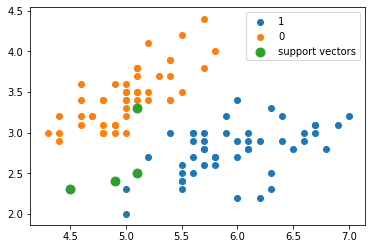

In [11]:
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], label='0')
plt.scatter(X[svc.support_, 0], X[svc.support_, 1], s=80, label='support vectors')
plt.legend()

非均衡问题
---

这个问题期望给予某一类或某个别样例能使用的关键词 class_weight 和 sample_weight 提高权重(importance).

SVC (而不是 NuSVC) 在`fit`方法中生成了一个关键词 `class_weight`. 它是形如 `{class_label : value}` 的字典, `value` 是浮点数大于 0 的值, 把类 `class_label` 的参数 `C` 设置为 `C * value`.

通过设置`class_weight ='balanced'`来自动设置C的值. `'balance'`参数自动对类进行加权，使得：
$$w_i = \frac {n}{kn_j}$$
$w_i$代表$i$类的权重, $n$是观察到的样本数, $n_i$是$i$类的观测数, $k$是类别的总数.
例如
$n_{x1} = 30, n_{x2} = 50$

则$w_{x1} =  \frac {80} {2*30} = \frac 4 3$, $w_{x2} =  \frac {80} {2*50} = \frac 4 5$


In [12]:
iris = datasets.load_iris()
X, y = iris.data[:100,:], iris.target[:100]
# 30 - 50
X = X[20:]
y = y[20:]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [13]:
svc = SVC(kernel='linear', class_weight='balanced', random_state=0)
svc.fit(X_std, y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
svc.score(X_std, y)

1.0

使用 `RBF `核时的 SVM 参数
---

使用径向基函数核（RBF）直观地探索支持向量分类器（SVC）中两个参数`C`和`gamma`的影响

In [15]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
X_xor

array([[ 1.7641,  0.4002],
       [ 0.9787,  2.2409],
       [ 1.8676, -0.9773],
       ...,
       [-0.2918, -0.7615],
       [ 0.8579,  1.1411],
       [ 1.4666,  0.8526]])

In [16]:
# 异或 一个为正一个为负的为1 这样2类数据 分别分布在 1,3 与 2, 4象限的数据 
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
y_xor

array([-1, -1,  1, ..., -1, -1, -1])

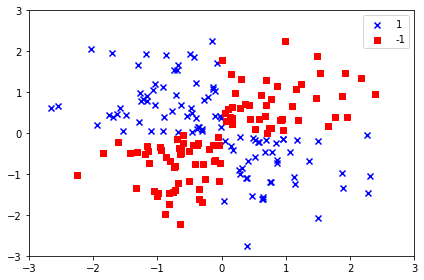

In [17]:
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, clf, resolution=0.01):
    # 可视化数据点和决策平面
    # 配置标记生成器
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'gray', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_max, x1_min = X[:, 0].max() + 1, X[:, 0].min() - 1
    x2_max, x2_min = X[:, 1].max() + 1, X[:, 1].min() - 1
    # 生成二维网格
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # 每个网格点的预测值
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # 转成网格形式
    z = z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, z, alpha=.4, cmap=cmap)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

    for inx, label in enumerate(np.unique(y)):
        plt.scatter(X[y==label, 0], X[y==label, 1],
                    marker=markers[inx], alpha=.8,
                    c=colors[inx], label=label)
    plt.legend(loc='best')

Score: 0.67


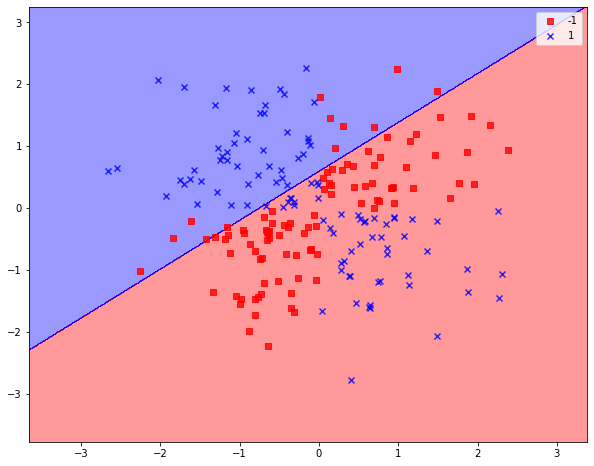

In [19]:
# 1 尝试使用线性核
svc = SVC(kernel='linear', C=1.,random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**Gamma**

gamma是 RBF 核的一个参数，可以被认为是核的“扩展”，因此也就是决策区域。 当gamma较低时，决策边界的“曲线”非常低，因此决策区域非常宽(Higher bias, lower variance)。 当gamma较高时，决策边界的“曲线”很高，这会在数据点周围创建决策边界的孤岛(Lower bias, higher variance)。 我们将在下面非常清楚地看到它。

**C**

C是 SVC 学习器的参数，是对数据点的错误分类的惩罚($C = \frac {1}{\lambda}$)。 当C很小时，分类器可以使用错误分类的数据点（高偏差，低方差）。 当C很大时，分类器因错误分类的数据而受到严重惩罚，因此与之相反来避免任何错误分类的数据点（低偏差，高方差）。

In [20]:
def plot_gamma(gamma):
    x = np.linspace(-3, 3, 601)
    y = np.exp(-gamma * (x-0)**2)
    plt.plot(x, y)

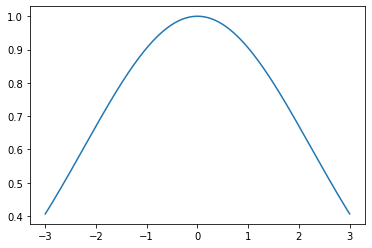

In [21]:
plot_gamma(0.1)

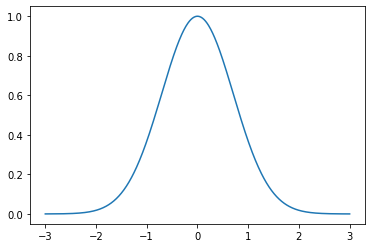

In [22]:
plot_gamma(1)

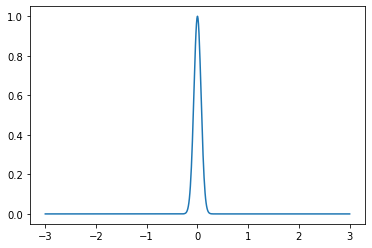

In [23]:
plot_gamma(100)

调整Gamma
---

**gamma=.01**

Score: 0.63


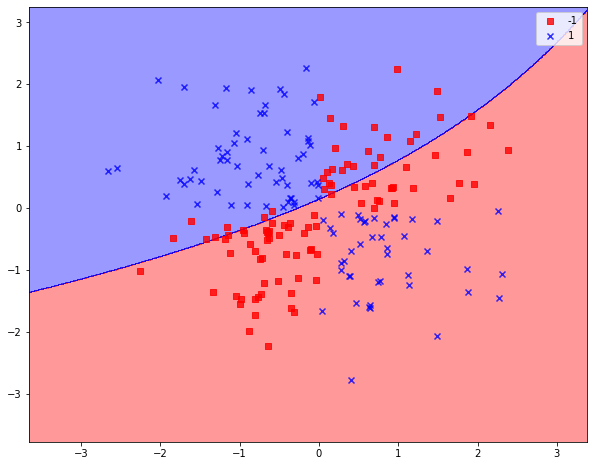

In [24]:
# 2 使用rbf核  k(u,v) = exp(-gamma|u-v|^2)
svc = SVC(kernel='rbf', gamma=.01, C=1., random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**gamma=1.0**

决策边界开始更好地覆盖数据的延展

Score: 0.965


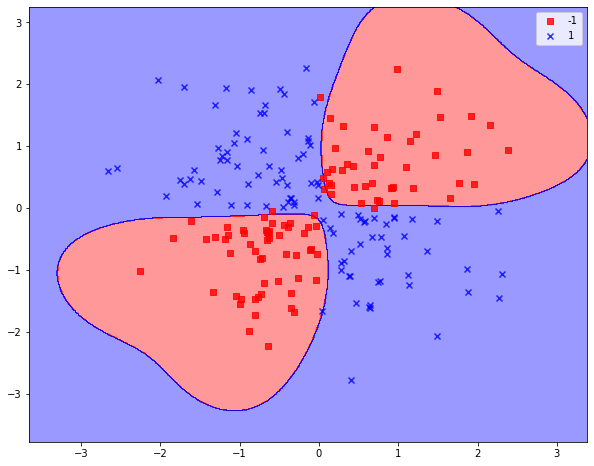

In [25]:
svc = SVC(kernel='rbf', gamma=1, C=1., random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**gamma=10**

核的延展不太明显。 决策边界开始极大地受到各个数据点（即方差）的影响。

Score: 0.995


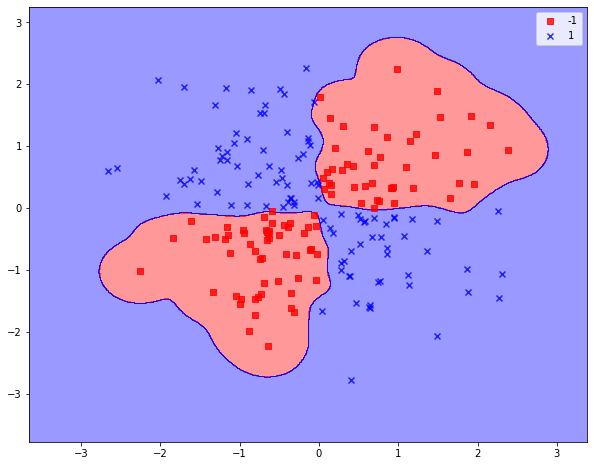

In [26]:
# 决策边界开始更好地覆盖数据的延展
svc = SVC(kernel='rbf', gamma=10, C=1., random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**Gamma = 100.0**

对于高'gamma'，决策边界几乎完全依赖于各个数据点，从而形成“孤岛”。 这些数据显然过拟合了。

Score: 1.0


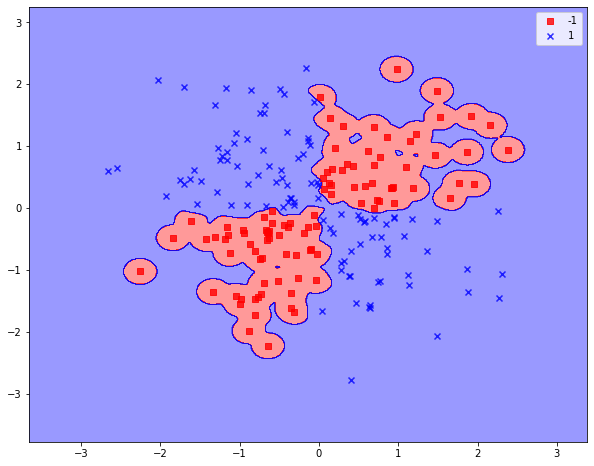

In [27]:
svc = SVC(kernel='rbf', gamma=100, C=1., random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

C - 惩罚参数
--- 
现在我们将对C重复这个过程：我们将使用相同的分类器，相同的数据，并保持gamma常量不变。 我们唯一要改变的是C，错误分类的惩罚。

**C=1**

分类器明显容忍错误分类的数据点。 蓝色区域有许多红点，红色区域有蓝点。

Score: 0.63


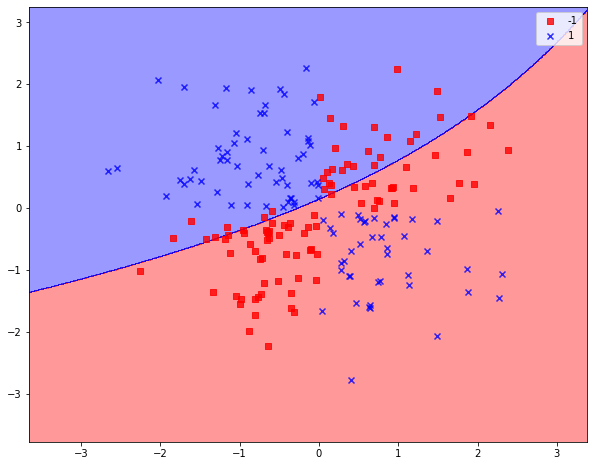

In [28]:
svc = SVC(kernel='rbf', gamma=.01, C=1., random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**C=10**

分类器对错误分类的数据点的容忍度较低，因此决策边界更严格。

Score: 0.73


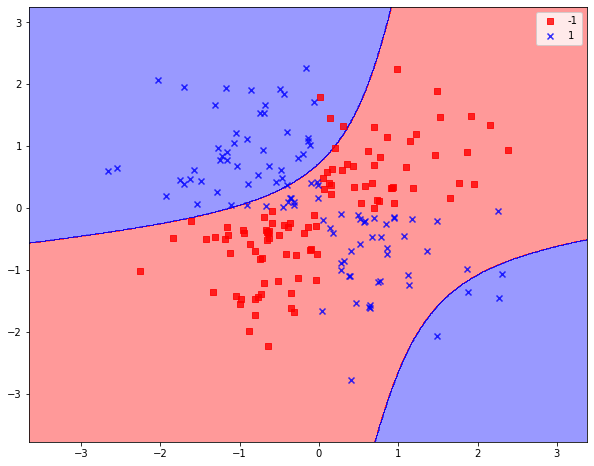

In [29]:
svc = SVC(kernel='rbf', gamma=.01, C=10, random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**C=1000**

分类器开始变得非常不能容忍错误分类的数据点，因此决策边界变得更少偏见并且具有更大的方差

Score: 0.96


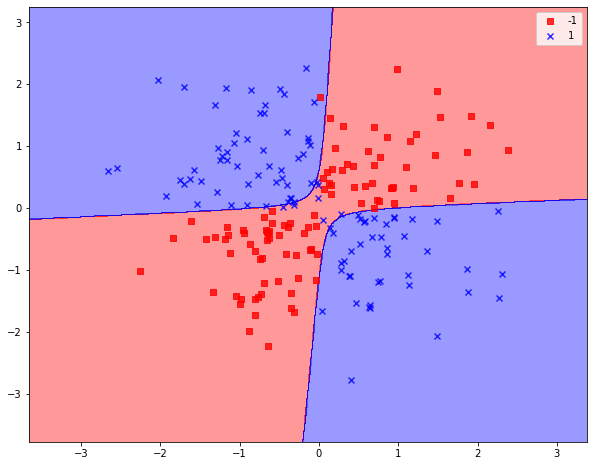

In [30]:
svc = SVC(kernel='rbf', gamma=.01, C=1000, random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**C = 10000**

在C = 10000时，分类器“非常努力”，不会对数据点进行错误分类，我们会看到过拟合的迹象。

Score: 0.985


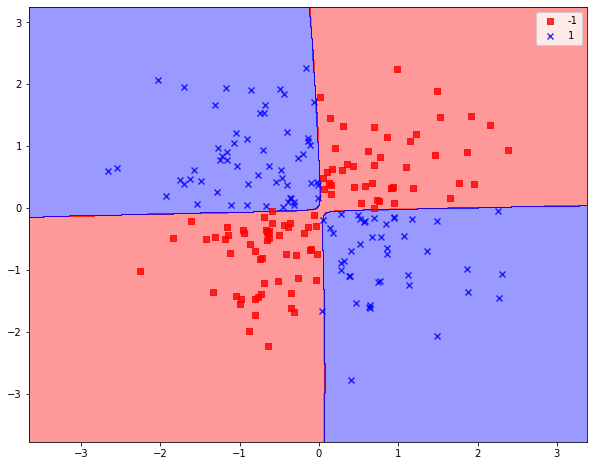

In [31]:
svc = SVC(kernel='rbf', gamma=.01, C=10000, random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**C=100000**

在C = 100000时，对于任何错误分类的数据点，分类器都会受到严重惩罚，因此边距很小。

Score: 0.995


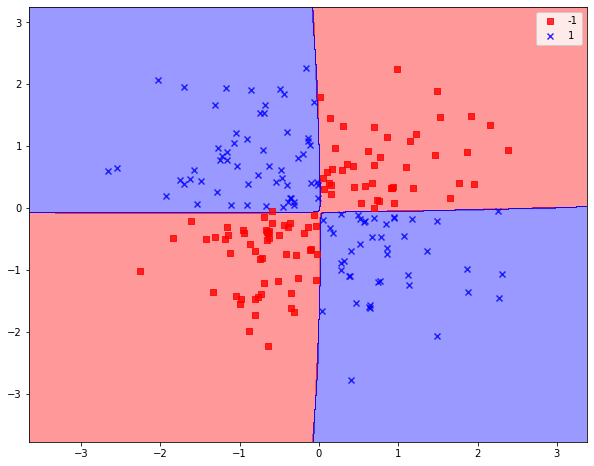

In [32]:
svc = SVC(kernel='rbf', gamma=.01, C=100000, random_state=0)
svc.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svc)
print(f"Score: {svc.score(X_xor, y_xor)}")

**多元分类**
---
SVC 和 NuSVC 为多元分类实现了 “one-against-one” 的方法 (Knerr et al., 1990) 如果 n_class 是类别的数量, 那么 n_class * (n_class - 1) / 2 分类器被重构, 而且每一个从两个类别中训练数据. 为了提供与其他分类器一致的接口, decision_function_shape 选项允许聚合 “one-against-one” 分类器的结果成 (n_samples, n_classes) 的大小到决策函

In [33]:
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [34]:
svc = SVC(decision_function_shape='ovo', random_state=0)
svc.fit(X_std, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

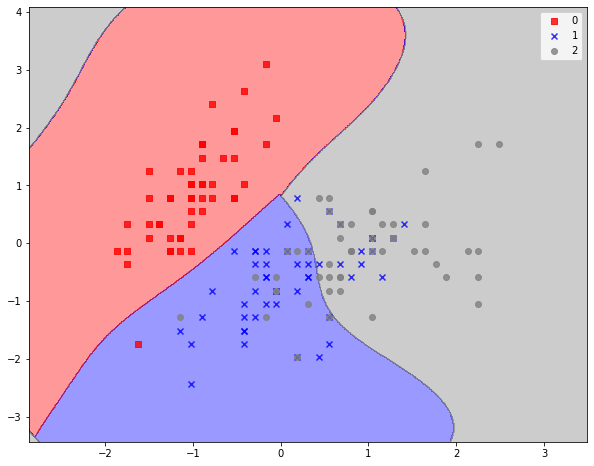

In [35]:
plot_decision_regions(X_std, y, svc)

decision_function(self, X)
    
    Evaluates the decision function for the samples in X.
    
    Parameters
    
        X [array-like, shape (n_samples, n_features)]
    Returns
        X [array-like, shape (n_samples, n_classes * (n_classes-1) / 2)] Returns X the decision function of the sample for each class in the model. If decision_function_shape=’ovr’, the shapeis (n_samples, n_classes

In [36]:
dec = svc.decision_function([[0, 1]])
dec

array([[ 0.1876,  0.1847, -0.1254]])

In [37]:
svc.intercept_

array([ 0.0136, -0.1633, -0.0957])

In [38]:
def line_(x, coef):
    return -(x*coef[0] + coef[1])/coef[2]

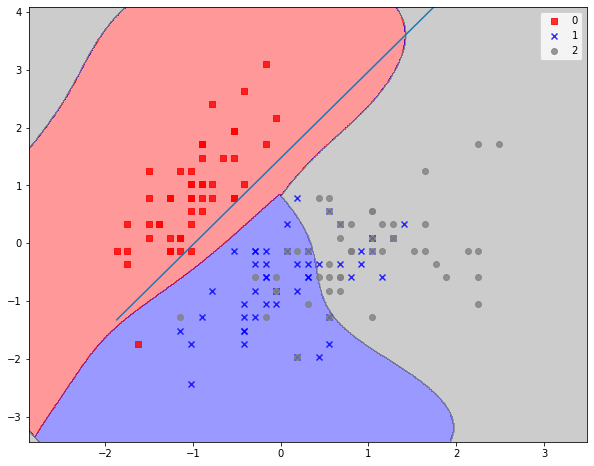

In [39]:
svc = SVC(decision_function_shape='ovr', random_state=0)
svc.fit(X_std, y)
plot_decision_regions(X_std, y, svc)
x1_max, x1_min = X_std[:, 0].max(), X_std[:, 0].min()
x2_max, x2_min = X_std[:, 1].max(), X_std[:, 1].min()
plt.plot([x1_min, x1_max], [line_(x1_min, dec[0]), line_(x1_max, dec[0])])